In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

#Library for density based clustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
df = gpd.read_file("/content/wayanad.csv", encoding = "latin1")
df

,Taluk,FPS ID,latitude,longitude
0,Vythiri,2262001,11.6102691,76.0839696
1,Vythiri,2262002,11.599934,76.08091
2,Vythiri,2262003,11.628978,76.06911
3,Vythiri,2262004,11.63681,76.09291
4,Vythiri,2262005,11.6406412,76.0065665
...,...,...,...,...
313,Mananthavady,2264100,11.802195,76.0306783
314,Mananthavady,2264101,11.797915,76.006256
315,Mananthavady,2264102,11.829006,75.9767
316,Mananthavady,2264103,11.840608,75.954155


In [ ]:
df.dtypes

,0
Taluk,object
FPS ID,object
latitude,object
longitude,object


In [ ]:
df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

In [ ]:
#checking for null values
df.isnull().sum()

,0
Taluk,0
FPS ID,0
latitude,3
longitude,3


In [ ]:
df = df.dropna(subset=["latitude", "longitude"])

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
geom=gpd.points_from_xy(df['longitude'],df['latitude'])
gdf=gpd.GeoDataFrame(df,geometry=geom,crs='EPSG:4326')

In [ ]:
gdf_proj = gdf.to_crs('EPSG:32643')

            Taluk   FPS ID   latitude  longitude  \
0         Vythiri  2262001  11.610269  76.083970   
1         Vythiri  2262002  11.599934  76.080910   
2         Vythiri  2262003  11.628978  76.069110   
3         Vythiri  2262004  11.636810  76.092910   
4         Vythiri  2262005  11.640641  76.006567   
..            ...      ...        ...        ...   
313  Mananthavady  2264100  11.802195  76.030678   
314  Mananthavady  2264101  11.797915  76.006256   
315  Mananthavady  2264102  11.829006  75.976700   
316  Mananthavady  2264103  11.840608  75.954155   
317  Mananthavady  2264104  11.733714  75.947230   

                           geometry  
0     POINT (618173.265 1283683.54)  
1     POINT (617844.012 1282539.28)  
2    POINT (616545.335 1285746.484)  
3    POINT (619136.765 1286622.524)  
4     POINT (609722.132 1287011.43)  
..                              ...  
313   POINT (612285.43 1304887.482)  
314   POINT (609626.23 1304404.472)  
315  POINT (606393.968 1307831.47

<Axes: >

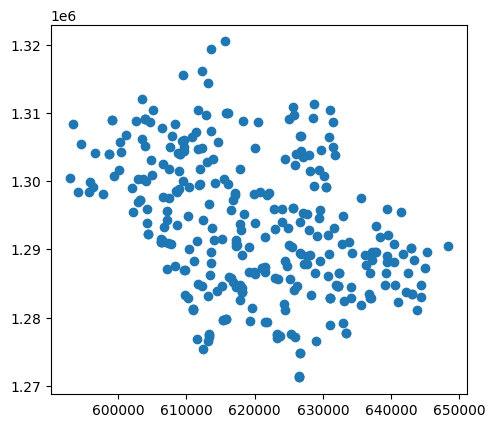

In [ ]:
print(gdf_proj)
gdf_proj.plot()

In [ ]:
#Extract coordinates
X = np.vstack([[gdf_proj.geometry.x, gdf_proj.geometry.y]]).T

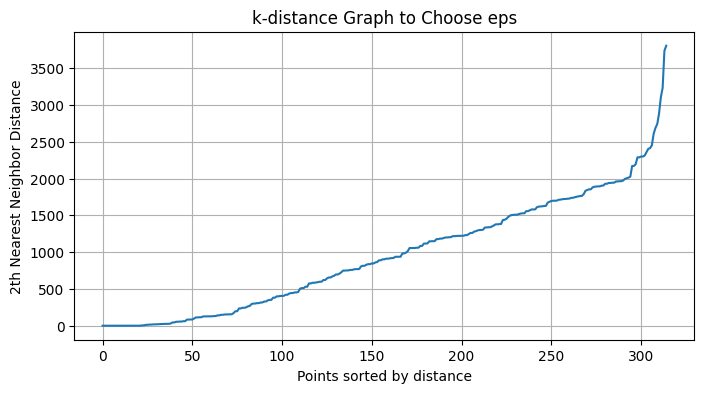

In [ ]:
#Elbow Method for finding the optimal eps
#where eps = distance threshold in meters; min_samples = core point threshold

min_samples = 2 #same as your DBSCAN parameter
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices  = neighbors_fit.kneighbors(X)

#Distances to the k-th Nearest neighbor
k_distances = np.sort(distances[:,min_samples-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f"{min_samples}th Nearest Neighbor Distance")
plt.title('k-distance Graph to Choose eps')
plt.grid(True)
plt.show()


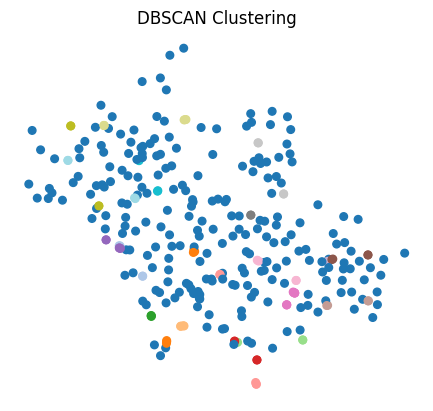

In [ ]:
#Run DBSCAN
db = DBSCAN(eps=280, min_samples=2, metric='euclidean') #adjust eps as needed
gdf['cluster'] = db.fit_predict(X)

#PLOT RESULT
gdf.plot(column='cluster',cmap='tab20', legend=False, markersize=30)
plt.title("DBSCAN Clustering")
plt.axis('off')
plt.show()

In [ ]:
labels = df['cluster'].values #or db.labels if you have it
#unique clusters include noise(-1)
unique_labels = np.